In [1]:
from google.colab import files
uploaded = files.upload()  # Esto abrirá un cuadro para subir el archivo


Saving Graficos.xlsx to Graficos.xlsx


Saving Graficos.xlsx to Graficos (1).xlsx


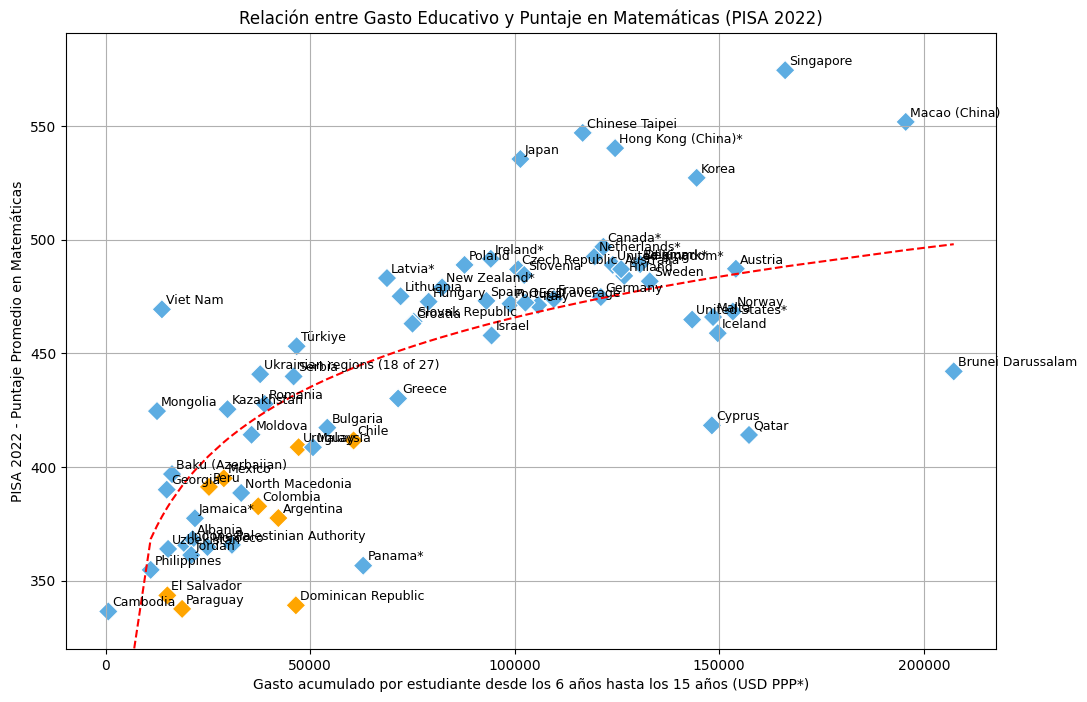

In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

# Subir el archivo (ejecuta esto si aún no lo has subido)
from google.colab import files
uploaded = files.upload()

# Cargar el archivo Excel
file_path = list(uploaded.keys())[0]  # Toma el nombre del archivo subido
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Lista de países de LATAM
latam_countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Costa Rica',
                   'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala',
                   'Honduras', 'Mexico', 'Panama', 'Paraguay', 'Peru', 'Uruguay']

# Crear una columna para identificar países de LATAM
data['LATAM'] = data['Country'].isin(latam_countries)

# Definir la función logarítmica
def log_relationship(x, a, b):
    return a * np.log(x) + b

# Ajustar la relación logarítmica
x = data['Expenditure']
y = data['Mathematics performance']
params, _ = curve_fit(log_relationship, x, y)
a, b = params

# Crear el gráfico
plt.figure(figsize=(12, 8))

# Graficar los puntos
sns.scatterplot(
    x='Expenditure',
    y='Mathematics performance',
    data=data,
    hue='LATAM',
    palette={True: 'orange', False: '#5dade2'},  # Naranja para LATAM, azul claro para el resto
    style='LATAM',
    markers={True: 'D', False: 'D'},  # Usar rombos para todos los puntos
    s=100,
    legend=False  # Quitar la leyenda
)

# Línea de regresión logarítmica ajustada
x_sorted = np.sort(x)
y_adjusted = log_relationship(x_sorted, a, b)
plt.plot(x_sorted, y_adjusted, color='red', linestyle='--',
         label=f'Relación Logarítmica\n$R^2=0.55$')

# Agregar las etiquetas de los países
for _, row in data.iterrows():
    plt.text(
        row['Expenditure'] + 1000,  # Desplazamiento horizontal
        row['Mathematics performance'] + 1,  # Desplazamiento vertical
        row['Country'],
        fontsize=9,
        ha='left',
        va='bottom'
    )

# Etiquetas y título
plt.title("Relación entre Gasto Educativo y Puntaje en Matemáticas (PISA 2022)")
plt.xlabel("Gasto acumulado por estudiante desde los 6 años hasta los 15 años (USD PPP*)")
plt.ylabel("PISA 2022 - Puntaje Promedio en Matemáticas")
plt.ylim(320, None)  # Ajustar el límite inferior del eje Y
plt.grid(True)

plt.show()
